<a href="https://colab.research.google.com/github/rizkynb/Tugas-Kuliah/blob/main/Tugas_2_Machine_Learning_Rizky_Nur_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
import string, re     # re stands for regular expression

In [ ]:
!pip install Sastrawi     # Library which can convert Indonesian affixed words into their base form
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory    # Stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory    # Filtering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm   # Processing data
tqdm.pandas()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import seaborn as sns

#Reading in Data

In [ ]:
path = '/content/drive/MyDrive/MSIB Batch 6/Machine Learning & Deep Learning/sample_data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(15)

,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...
5,Positive,mantap barangnya ??????,mantap barangnya ??????
6,Positive,barang bagus sesuai gambar tapi gaberwarna,barang bagus sesuai gambar tapi gaberwarna
7,Positive,"Respon seller sangat cepat dan ramah, packing ...","respon seller sangat cepat dan ramah, packing ..."
8,Positive,"Respon cepat, barang dpt digunakan dengan baik","respon cepat, barang dpt digunakan dengan baik"
9,Positive,Bukunya bagus bgt semoga anakku suka.. pengema...,bukunya bagus bgt semoga anakku suka.. pengema...


In [ ]:
df.shape

(1200, 3)

In [ ]:
df.Sentiment.value_counts()

Sentiment
Positive    600
Negative    600
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Sentiment          0
Customer Review    0
corpus             0
dtype: int64

#Modeling

In [ ]:
x, y = df.corpus, df.Sentiment

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (840, 3680)
Test size:  (360, 3680)


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.90      0.96      0.93       189
    Positive       0.95      0.88      0.92       171

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



<Axes: >

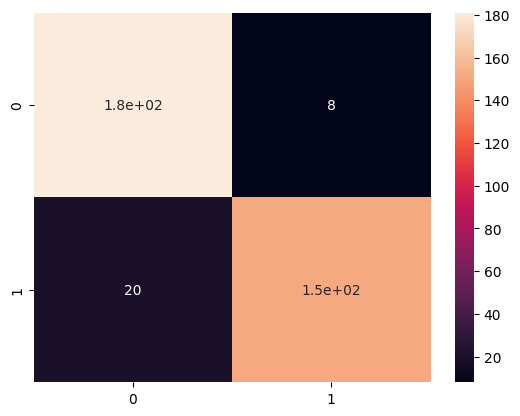

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)